In [4]:
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from IPython import display

import time

In [5]:

def plot_state(c,colors=("white","red")):
    """
    Plot a state from Conway's Game of Life.
    """
    
    for i in range(c.dimensions[0]):
        for j in range(c.dimensions[1]):
            plt.plot(i,j,'o',color=colors[int(c.state[i,j])])

    plt.show()


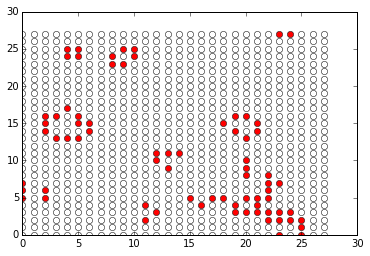

In [ ]:
import conway
c = conway.Conway(starting_density=0.5)
plot_state(c)

for i in range(100):
    c.iterate()
    
    display.clear_output(wait=True)
    plot_state(c)
    
    #display.display()
    
    time.sleep(0.1)
    